## Read .ghg metadata

In [1]:
import preProcessing
import importlib
import time
importlib.reload(preProcessing)
T1 = time.time()

# Need one or more metadata templates if working with .dat files
# template = ['Y:/BBS/TOA5_BBS.FLUX_2023_06_14_1500.metadata']

# pr = preProcessing.read_ALL('BBS',file_type='dat',metadata_template=template)

updates = 'Y:/BB/Metadata_Updates.csv'
pr = preProcessing.read_ALL('BB',file_type='ghg',metadata_updates=updates,reset=1)
# If updates/corrections must be made to metadata (e.g., undocumented orientation changes) a .csv files of updates can be provided

for y in range(2015,2024):
    for m in range(1,13):
        pr.find_files(y,m)

T2 = time.time()

print('\n')
print('Runtime: ',(T2-T1)/60,' minutes')


Not a valid directory: Y:/BB/raw/2015/01/
Not a valid directory: Y:/BB/raw/2015/02/
Starting fresh run
Preprocessing 2015 03[████████████████████████████████████████████████████████████] 2/2

Pre-existing metadata imported
Preprocessing 2015 04[████████████████████████████████████████████████████████████] 2/2

Not a valid directory: Y:/BB/raw/2015/05/
Pre-existing metadata imported
Pre-existing metadata imported
Preprocessing 2015 06[████████████████████████████████████████████████████████████] 2/2

Pre-existing metadata imported


KeyError: "None of [Index(['altitude', 'latitude', 'longitude', 'canopy_height'], dtype='object')] are in the [columns]"

In [15]:
# ## Implement pre-processing procedures to exclude data by conditions (e.g., low flow rate)

# import numpy as np
# pr.dataRecords['flow_rate_7200']
# pr.dataRecords.loc[pr.dataRecords['flow_rate_7200'].abs()>1e2,'flow_rate_7200']=np.nan
# pr.dataRecords['flow_rate_7200'].plot()
# # pr.dataRecords['col_air_t'].plot()#['altitude'].describe()

In [2]:
# https://www.licor.com/env/support/EddyPro/topics/low-pass-filtering.html

hf_corrections = {
    'Moncrieff et al. (1997)':1,
    'Horst (1997)':2,
    'brom et al. (2007)':3,
    'Fratini et al. (2012)':4, # Recommended , when sufficient data (>1 month) are available
    'Massman (2000, 2001)':5
}
bin_sp_avail=[0,1]
full_sp_avail=[0,1]
sa_bin_spectra='Path'
sa_full_spectra = 'Path'


In [12]:
import setupEP as eP
import importlib
import time
importlib.reload(eP)

########## Note - incomplete ghg or biomet files can crash program (preprocessing procedures should help prevent that by re-naming incomplete files)

T1 = time.time()
# mR = eP.makeRun('ep_Templates/DefaultSettings.eddypro','BBS',Processes=6,priority = 'high priority')
# mR.runDates(['2023-01-01 00:00','2024-03-31 23:59'])

# mR = eP.makeRun('ep_Templates/DefaultSettings.eddypro','BB',Processes=6,priority = 'high priority')
mR = eP.makeRun('ep_Templates/DefaultSettings.eddypro','BB',Processes=6,priority = 'high priority')
# mR.runDates(['2015-01-01 00:00','2015-12-31 23:59'])

T2 = time.time()
print('\n')
print('Runtime: ',(T2-T1)/60)



Runtime:  0.0006065845489501953


## Full Runtime

### Reading & Writing all to Y: drive:

1 Month of BB data (20 hz)

**Preprocessing**: 3.91 minutes (8 cores)
**Processing**: 56.92 minutes (6 cores)

Total: **60.83** minutes

### Reading & Preprocessing on Y: drive then writing EddyPro results locally:

1 Month of BB data (20 hz)

**Preprocessing**: 3.91 minutes (8 cores)
**Processing**: 55.74 minutes (6 cores)

Total: **59.65** minutes

### Copying data to C then writing EddyPro results locally:

1 Month of BB data (20 hz)

**Preprocessing**: 6.30 minutes (1 core copy > 8 core preprocessing)

**Processing**: 54.33 minutes (6 cores)

Total: **60.3** minutes

* Paralellizing data copy could shave enought time to get marginal benfit, but doesn't look to matter much

,wind_speed,u*,wind_dir,Ta_1_1_1,H
TIMESTAMP,,,,,


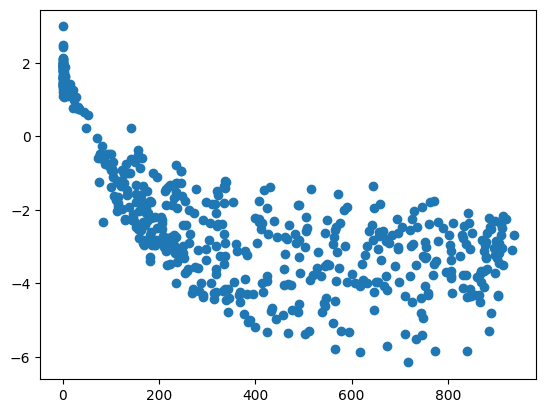

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(mR.all_outputs['fulloutput'],skiprows=[0,2],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')
bm = pd.read_csv(mR.all_outputs['biomet'],skiprows=[1],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')

df = pd.concat([df,bm[['RH_1_1_1','Ta_1_1_1','Rg_1_1_1','LWIN_1_1_1']]],axis=1)
df.loc[df['qc_co2_flux']>0,'co2_flux']=np.nan
df.loc[df['u*']<0.15,'co2_flux']=np.nan

plt.scatter(df['Rg_1_1_1'],df['co2_flux'])

df.loc[df['co2_flux']>20,['wind_speed','u*','wind_dir','Ta_1_1_1','H']]


,LE_fratini,LE_moncrieff,co2_flux_fratini,co2_flux_moncrieff,ch4_flux_fratini,ch4_flux_moncrieff
count,542.000,542.000,543.000,543.000,374.000,361.000
mean,152.558,93.803,-3.149,-2.969,0.072,0.065
std,95.642,67.008,1.691,1.584,0.020,0.018
min,2.387,1.310,-6.908,-6.401,-0.041,-0.048
25%,70.863,34.734,-4.341,-4.072,0.059,0.053
50%,147.756,84.936,-3.376,-3.099,0.071,0.064
75%,234.345,145.632,-2.143,-2.288,0.086,0.077
max,353.413,304.631,2.777,2.618,0.157,0.144


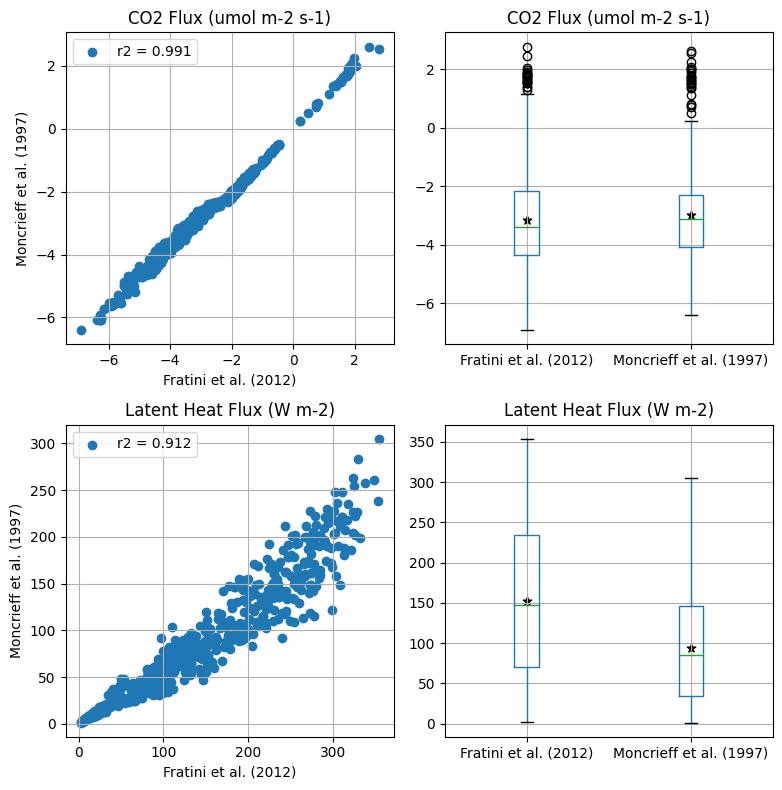

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
monc = 'Y:\\BB\\Spectral_Comp\\Moncrieff/'+'eddypro_BB_20230601_20230630_full_output_2024-03-15T153700_adv.csv'
frat = 'Y:\\BB\\Spectral_Comp\\Fratini/'+'eddypro_Spectral_Correction_fratini_full_output_2024-03-19T000447_adv.csv'
df_fratini = pd.read_csv(frat,skiprows=[0,2],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')
df_moncrieff = pd.read_csv(monc,skiprows=[0,2],na_values=-9999,parse_dates={'TIMESTAMP':['date','time']},index_col='TIMESTAMP')

def Filt(df):
    df['filt'] = 1
    df.loc[df['u*']<.15,'filt']=np.nan
    df.loc[df['qc_co2_flux']>0,'filt']=np.nan
    df.loc[df['qc_LE']>0,'filt']=np.nan
    return(df)

df_fratini = Filt(df_fratini)
df_moncrieff = Filt(df_moncrieff)


# df_fratini=df_fratini.loc[df_fratini.index.month==6].copy()

cols = ['filt','u*','co2_flux','qc_co2_flux','LE','qc_LE','H','qc_H','ch4_flux','qc_ch4_flux']
frat_cols = {key: key+'_fratini' for key in cols}
monc_cols = {key: key+'_moncrieff' for key in cols}

df_fratini = df_fratini[cols].rename(columns=frat_cols)
df_moncrieff = df_moncrieff[cols].rename(columns=monc_cols)

df = df_fratini.join(df_moncrieff)

df['filt']=df['filt_fratini']*df['filt_moncrieff']

for col in df.columns:
    if col !='filt':
        df[col]=df[col]*df['filt']


fig,ax=plt.subplots(2,2,figsize=(8,8))


ax[0,0].scatter(df['co2_flux_fratini'],df['co2_flux_moncrieff'],label=f"r2 = {(df[['co2_flux_fratini','co2_flux_moncrieff']].corr()**2)['co2_flux_moncrieff'].round(3).values[0]}")
ax[0,0].set_xlabel('Fratini et al. (2012)')
ax[0,0].set_ylabel('Moncrieff et al. (1997)')
ax[0,0].set_title('CO2 Flux (umol m-2 s-1)')
ax[0,0].legend()
ax[0,0].grid()

df[['co2_flux_fratini','co2_flux_moncrieff']].boxplot(ax=ax[0,1])
ax[0,1].scatter([1,2],df[['co2_flux_fratini','co2_flux_moncrieff']].mean().values,marker='*',s=40,color='k')
ax[0,1].set_xticklabels(['Fratini et al. (2012)','Moncrieff et al. (1997)'])
ax[0,1].set_title('CO2 Flux (umol m-2 s-1)')


ax[1,0].scatter(df['LE_fratini'],df['LE_moncrieff'],label=f"r2 = {(df[['LE_fratini','LE_moncrieff']].corr()**2)['LE_moncrieff'].round(3).values[0]}")
ax[1,0].set_xlabel('Fratini et al. (2012)')
ax[1,0].set_ylabel('Moncrieff et al. (1997)')
ax[1,0].set_title('Latent Heat Flux (W m-2)')
ax[1,0].legend()
ax[1,0].grid()

df[['LE_fratini','LE_moncrieff']].boxplot(ax=ax[1,1])
ax[1,1].scatter([1,2],df[['LE_fratini','LE_moncrieff']].mean().values,marker='*',s=40,color='k')
ax[1,1].set_xticklabels(['Fratini et al. (2012)','Moncrieff et al. (1997)'])
ax[1,1].set_title('Latent Heat Flux (W m-2)')

plt.tight_layout()


df[['LE_fratini','LE_moncrieff','co2_flux_fratini','co2_flux_moncrieff','ch4_flux_fratini','ch4_flux_moncrieff',]].describe().round(3)

# Speedtests

All times in minutes

### 4 threads (8 timesteps each)

Normal priority: 2.05
High priority: 1.91

### 4 threads (48 timesteps each x 12 days)

High priority: 29

### Eddypro GUI (1 run [12 days, 576 timesteps])

High priority: 90